In [2]:
#importing required libraries - use pip install -r requirements.txt in a virtual env to avoid run time complications 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/creditcard.csv')

In [4]:
#checking How much data we have, details about columsn and any missing data
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#gives us the details about fruad vs legitimate values, in this case we have 0 is legitimate and 1 shows us the fraud values
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

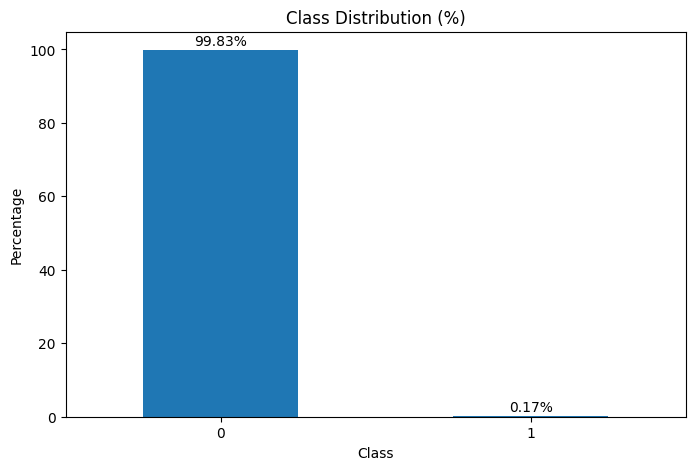

In [6]:
#ploting using matlab
class_counts = df['Class'].value_counts(normalize=True) * 100
ax = class_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Class Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.xticks(rotation=0)

# Add percentage labels on top of bars
for i, v in enumerate(class_counts):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [9]:
# Preprocessing data - dividing into x (all the columns except class which is the category of fraud and ligitmate) and y 
X = df.drop('Class', axis=1)
Y = df['Class']

In [ ]:
#spliting the data into 80%  train and 20% test Why 42? Common convention (from "The Hitchhiker's Guide to the Galaxy"
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#scaling the code -> mean = 0 and std = 1 , model treats all features equally and gives better performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Train logistic Regression on imbalanced data (traditional method)
# Logistic regession -> probability that something belongs to a particular category 
from sklearn.linear_model import LogisticRegression


# Train on imbalanced data
lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
lr_baseline.fit(X_train_scaled, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# Results from imblanaced LR - (traditional method)

from sklearn.metrics import f1_score, confusion_matrix
# Predict on test set
y_pred_lr_baseline = lr_baseline.predict(X_test_scaled)

f1_lr_baseline = f1_score(y_test, y_pred_lr_baseline)
print("F1-Score: %.5f" % f1_lr_baseline)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_baseline))

#                   Predicted Positive    Predicted Negative
# Actual Positive          TP                   FN
# Actual Negative          FP                   TN

""" our output
F1-Score: 0.67485
Confusion Matrix:
[[56854    10]
 [   43    55]]
"""


F1-Score: 0.67485
Confusion Matrix:
[[56854    10]
 [   43    55]]


'\nF1-Score: 0.67485\nConfusion Matrix:\n[[56854    10]\n [   43    55]]\n'

In [ ]:
#Logistic Regression with SMOTE (synthetic Minority Oversampling Technique)
#basically the issue we have above is we have more legitimate onces compared to fruad thus the system struggles with detecting 
# frauds compared to legimiates, so we create more fake fraud examples (synthetic) so the training is balanced
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only 
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

#This is the data we used to train our Tradition LR
print("Before SMOTE:")
print("  Legitimate cases:", (y_train == 0).sum())
print("  Fraud cases:", (y_train == 1).sum())
print("  Total:", len(y_train))

#This is our new balanced dataset to train our 
print("\nAfter SMOTE:")
print("  Legitimate cases:", (y_train_balanced == 0).sum())
print("  Fraud cases:", y_train_balanced.sum())
print("  Total:", len(y_train_balanced))

Before SMOTE:
  Legitimate cases: 227451
  Fraud cases: 394
  Total: 227845

After SMOTE:
  Legitimate cases: 227451
  Fraud cases: 227451
  Total: 454902


In [ ]:
# Train on balanced data
lr_smote = LogisticRegression(random_state=42, max_iter=1000)
lr_smote.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred_lr_smote = lr_smote.predict(X_test_scaled)

# Result
f1_lr_smote = f1_score(y_test, y_pred_lr_smote)
print("F1-Score (LR with SMOTE): %.5f" % f1_lr_smote)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_smote))

""""
F1-Score (LR with SMOTE): F1-Score (LR with SMOTE): 0.11057
Confusion Matrix:
[[55424  1440]
 [    8    90]]
"""

F1-Score (LR with SMOTE): 0.11057
Confusion Matrix:
[[55424  1440]
 [    8    90]]


'"\nF1-Score (LR with SMOTE): 0.11056511056511056\nConfusion Matrix:\n[[55424  1440]\n [    8    90]]\n'

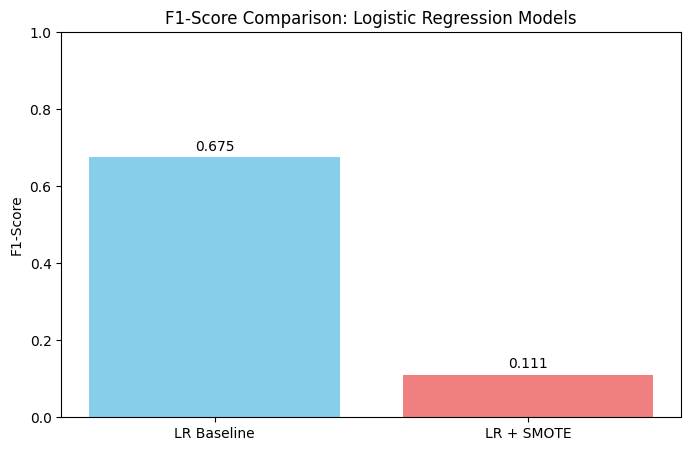

In [42]:
# Bar chart comparing F1-scores
models = ['LR Baseline', 'LR + SMOTE']
f1_scores = [f1_lr_baseline, f1_lr_smote]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, f1_scores, color=['skyblue', 'lightcoral'])
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison: Logistic Regression Models')
plt.ylim(0, 1)

# Add value labels on bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.show()

#Conclusion we got from the above 2 tests
#LR Baseline (F1=0.0.67485) vs LR+SMOTE (F1=0.11057)
#SMOTE caught more frauds (90 vs 55) but had way more false alarms (1440 vs 10)
#Conclusion: Balancing doesn't always improve F1-score - trade-off between catching frauds and false alarms


In [43]:
#Test 2: Neural Network (MLP) Baseline with balanced and imbalanced data
# Import TensorFlow/Keras for building neural networks
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow import keras


#Building a MLP 
mlp_baseline = keras.Sequential([
    layers.Input(shape=(30,)),              
    layers.Dense(200, activation='relu'),    
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [47]:
# Configure how the model learns
mlp_baseline.compile(
    optimizer='adam',                    # How it learns (adjusts connections)
    loss='binary_crossentropy',          # How it measures mistakes
    metrics=['accuracy']                 # Track how many it gets right
)

In [48]:
# Train the model on imbalanced data
mlp_baseline.fit(
    X_train_scaled,      # Training features (your transaction data)
    y_train,            # Training labels (fraud=1 or legitimate=0)
    epochs=10,          # Go through data 10 times
    batch_size=32,      # Process 32 transactions at a time
    verbose=1           # Show progress bars
)

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 691us/step - accuracy: 0.9991 - loss: 0.0052
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 700us/step - accuracy: 0.9994 - loss: 0.0032
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 707us/step - accuracy: 0.9994 - loss: 0.0031
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 704us/step - accuracy: 0.9994 - loss: 0.0028
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 706us/step - accuracy: 0.9994 - loss: 0.0026
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 716us/step - accuracy: 0.9995 - loss: 0.0023
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 5s 733us/step - accuracy: 0.9995 - loss: 0.0022
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 808us/step - accuracy: 0.9995 - loss: 0.0021
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 785us/step - accuracy: 0.9995 - loss: 0.0020
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 780us/step - accuracy: 0.9995 - loss: 0.0022


In [49]:
# Make predictions on test set
y_pred_mlp_baseline = (mlp_baseline.predict(X_test_scaled) > 0.5).astype(int)

# Evaluate
from sklearn.metrics import f1_score, confusion_matrix

f1_mlp_baseline = f1_score(y_test, y_pred_mlp_baseline)
print("F1-Score (MLP Baseline):", f1_mlp_baseline)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp_baseline))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step
F1-Score (MLP Baseline): 0.7902439024390244
Confusion Matrix:
[[56838    26]
 [   17    81]]


In [50]:
# Build MLP model for SMOTE (same structure)
mlp_smote = keras.Sequential([
    layers.Input(shape=(30,)),              
    layers.Dense(100, activation='relu'),    
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile
mlp_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on balanced data (use X_train_balanced and y_train_balanced from before)
mlp_smote.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 663us/step - accuracy: 0.9956 - loss: 0.0147
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 656us/step - accuracy: 0.9990 - loss: 0.0042
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 658us/step - accuracy: 0.9993 - loss: 0.0031
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 664us/step - accuracy: 0.9995 - loss: 0.0025
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 667us/step - accuracy: 0.9995 - loss: 0.0023
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 669us/step - accuracy: 0.9996 - loss: 0.0020
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 669us/step - accuracy: 0.9996 - loss: 0.0018
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 669us/step - accuracy: 0.9997 - loss: 0.0016
Epoch 9/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 672us/step - accuracy: 0.9997 - loss: 0.0016
Epoch 10/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 666us/step - accuracy: 0.9997 - loss: 0.0014


In [51]:
# Make predictions on test set
y_pred_mlp_smote = (mlp_smote.predict(X_test_scaled) > 0.5).astype(int)

# Evaluate
f1_mlp_smote = f1_score(y_test, y_pred_mlp_smote)
print("F1-Score (MLP + SMOTE):", f1_mlp_smote)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp_smote))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step
F1-Score (MLP + SMOTE): 0.7788461538461539
Confusion Matrix:
[[56835    29]
 [   17    81]]


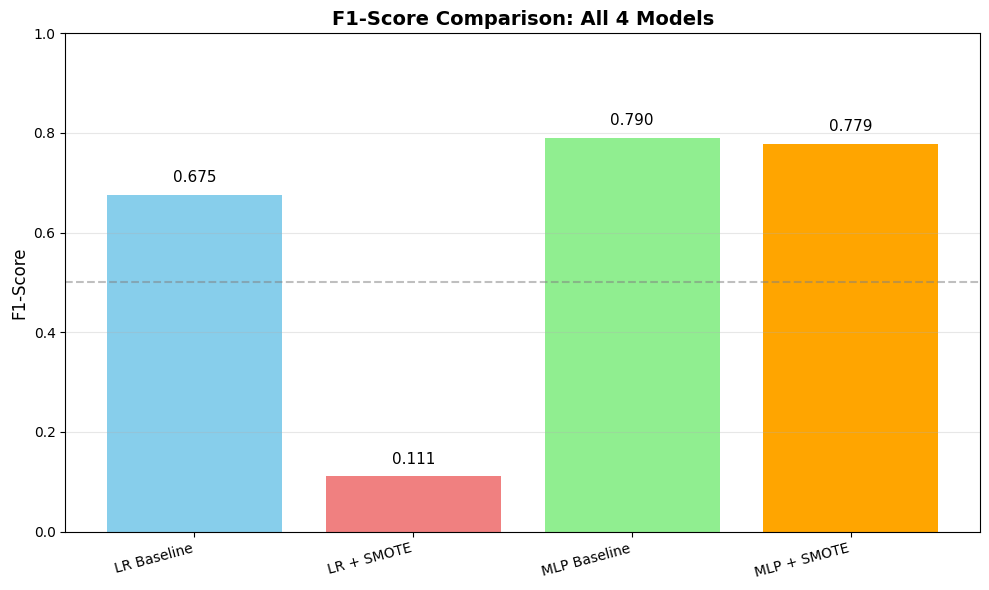

In [52]:
# Bar chart comparing F1-scores for all 4 models
models = ['LR Baseline', 'LR + SMOTE', 'MLP Baseline', 'MLP + SMOTE']
f1_scores = [f1_lr_baseline, f1_lr_smote, f1_mlp_baseline, f1_mlp_smote]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.ylabel('F1-Score', fontsize=12)
plt.title('F1-Score Comparison: All 4 Models', fontsize=14, fontweight='bold')
plt.ylim(0, 1)

# Add value labels on top of bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{score:.3f}', ha='center', va='bottom', fontsize=11)

# Add horizontal line at 0.5 for reference
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Baseline (0.5)')

plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()